## Оглавление проекта

- <a href='#description'>Описание проекта</a>
- <a href='#purpose'>Цель проекта</a>
- <a href='#data_description'>Описание данных</a>


- <a href='#load'> 1. Загрузка необходимых библиотек. Изучение общей информации.</a>
- <a href='#data_preparation'>2. Подготовка данных</a>
- <a href='#data_analysis'>3. Исследовательский анализ данных</a>
- <a href='#users'>4. Портрет пользователя каждого региона</a> 
 


- <a href='#conclusion'>Общий вывод</a>

</span><a id='description'></a>
_______
## Описание проекта  

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Представленны данные до 2016 года. 

</span><a id='purpose'></a>
___________

## Цель проекта

Провести исследовательский анализ данных и  отработать принцип работы. 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

</span><a id='data_description'></a>
___________
## Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Значения рейтинга ESRB**  
- **E** (Everyone) — «Для всех»  
- **M** (Mature) — «Для взрослых»  
- **T** (Teen) — «Подросткам»  
- **E10+** (Everyone 10 and older) — «Для всех от 10 лет и старше»
- **K-A** (Kids to Adults) - "Детям и Взрослым" до 1998 г. позже переименована в **E** («Everyone»)
- **AO** (Adults Only 18+) — «Только для взрослых»
- **EC** (Early childhood) — «Для детей младшего возраста»
- **RP** (Rating Pending) — «Рейтинг ожидается»

Данные за 2016 год могут быть неполными.

</span><a id='load'></a>
## 1. Загрузка необходимых библиотек. Изучение общей информации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()
games.sample(5)
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов соответствуют данным. Большое количество пропусков в столбцах *critic_score* , *user_score*, *rating*. Данные в столбце *user_score* имеют тип object - это требует исправления для дальнейшего анализа. Тип данных в столбце *year_of_release* - float64 приведем к целочисленному int, что бы лучше читалась информация на графиках. 

</span><a id='data_preparation'></a>
____________
## 2. Подготовка данных

Приведем названия столбцов к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()

_____
Изучим по очереди пропуски во всех столбцах.

In [5]:
#количество пропусков в столбцах
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#пропуски в name и genre - одни и те же строки
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очень много отсутствующих значений в этих двух строках. 

In [7]:
games[games['year_of_release'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14685,World of Tanks,X360,NaN,Shooter,0.00,0.03,0.0,0.00,NaN,5.2,NaN
2536,Shaun White Snowboarding,X360,NaN,Sports,0.48,0.25,0.0,0.08,60.0,7.6,T
12209,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,0.06,0.00,0.0,0.00,NaN,tbd,E
6019,Nicktoons: Battle for Volcano Island,GC,NaN,Action,0.22,0.06,0.0,0.01,NaN,7,E
9218,Bejeweled 3,X360,NaN,Puzzle,0.13,0.00,0.0,0.01,78.0,8.4,E


Корректно заполнить пропуски year_of_release исходя из имеющихся данных не получится. Таких строк меньше 2%.

Удаляем строки с пропущенными значениями в столбцах *name*, *year_of_release*, *genre*

In [8]:
games = games.dropna(subset=['name','year_of_release','genre'])
#games.isna().sum()

Для лучшего отображения на графиках преобразуем year_of_release в формат int

In [9]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Необходимы для дальнейшего анализа столбец *user_score* помимо рейтинга (от 1 до 10) содержит строки 'tbd' - to be determined - рейтинг либо отсутствует, либо значений не хватает для подсчета. По факту для анализа эти значения отстутствуют.

Преобразую столбец в удобный для анализа тип float, tbt значения будут заменены на NaN.

In [10]:
games[games['user_score'] == 'tbd'].head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T


In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors ='coerce')

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


______
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец *total_sales*

In [13]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

______
В этом шаге дополнительно посмотрим на коэффициенты корреляции 

In [14]:
games.corr().style.background_gradient('PuBu')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.0923264,0.00404478,-0.168477,0.0378211,0.011411,-0.267851,-0.0762203
na_sales,-0.0923264,1,0.766546,0.451162,0.638479,0.240083,0.0855492,0.941241
eu_sales,0.00404478,0.766546,1,0.435894,0.722679,0.221276,0.0555299,0.901673
jp_sales,-0.168477,0.451162,0.435894,1,0.291562,0.153474,0.126372,0.613305
other_sales,0.0378211,0.638479,0.722679,0.291562,1,0.19841,0.0569351,0.74893
critic_score,0.011411,0.240083,0.221276,0.153474,0.19841,1,0.579671,0.245349
user_score,-0.267851,0.0855492,0.0555299,0.126372,0.0569351,0.579671,1,0.087984
total_sales,-0.0762203,0.941241,0.901673,0.613305,0.74893,0.245349,0.087984,1


Интересно, что общие продажи на прямую не зависят от рейтинга пользователей - коэффициент 0.088!

_______
Посмотрим на названия платформ, жанров и рейтингов.

In [15]:
#названия всех платформ
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
#названия всех жанров
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
#названия рейтингов
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Вывод по подготовке данных

- названия столбцов приведены к нижнему регистру
- удалены строки с пропусками в столбцах *name*, *year_of_release*, *genre*. 

Пропуски в этих столбцах могут вызванны сбором данных из разных источников. Пропуски же в столбцах с рейтингом, скорее связаны просто с отстуствие таковых у данных игр. Возможно для старых игр рейтинг не формировался или игра отсутствовала в базе с рейтингами.
- тип данных в столбце *year_of_release* изменен на int для корректного отображения на графиках
- тип данных в столбце *user_score* заменен на float, значения 'tbd' (рейтинг еще не подсчитан) заменениы на NaN
- в столбце *total_sales* посчитаны суммарные продажи повсем регионам
- в описание данных <a href='#data_description'>добавлена</a> расшифорвка ESRB рейтинга из столбца *rating*


</span><a id='data_analysis'></a>
__________
## 3. Исследовательский анализ данных 

Посмотрим, сколько игр выпускалось в разные годы.

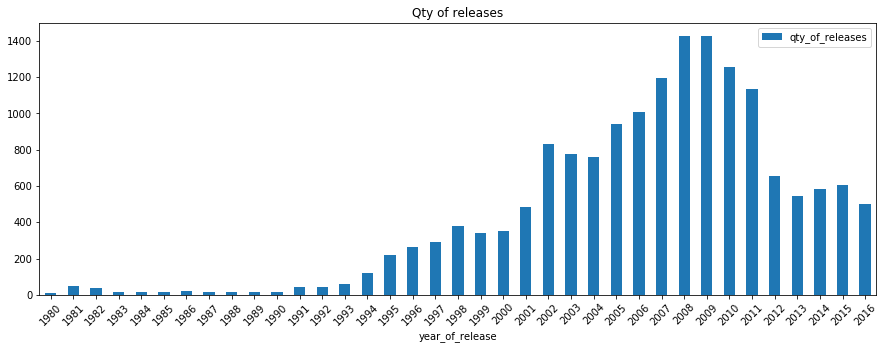

In [18]:
#сгруппируем по дате релиза и поситаем количество игр выпущенное по годам
years_grouped = games.groupby('year_of_release').agg({'name':'count'})
years_grouped.columns = ['qty_of_releases']
years_grouped.plot(kind='bar', figsize=(15,5), rot=45)
plt.title('Qty of releases')
plt.show()

Активное развитие рынка видеоигр в 90-е, 2000-е были игровым бумом (пиковые продажи), в 2012 ситуация сильно поменялась - выпускать игр стали значительно меньше (возможно количество прешло в качество). Для прогноза на 2017 год, можно ориентироваться на текущую ситуацию, которая характеризуется 2013-2016 годами.

_________
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [19]:
#посмотрим сколько игр было выпущено для каждой платформы
platform_year_grouped = (games.groupby(['platform','year_of_release'])
                                .agg({'total_sales':'sum'}).reset_index())

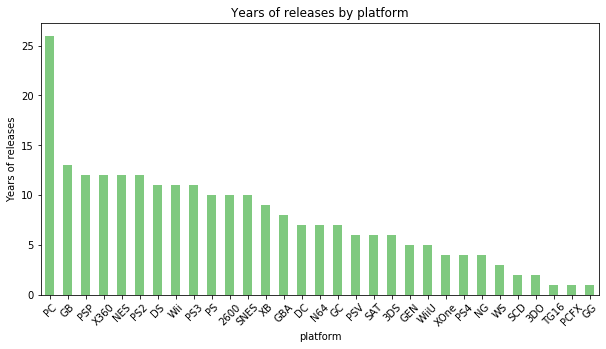

In [20]:
#в течении скольки лет для каждой из платформ выпускались игры
year_for_platform = (platform_year_grouped.groupby('platform')['year_of_release'].count()
                                        .sort_values(ascending=False))
year_for_platform.plot(kind='bar', figsize=(10,5), rot=45,colormap='Accent')
plt.title('Years of releases by platform')
plt.ylabel('Years of releases')
plt.show()


Для PC игры выпускались дольше всего. Самая живучая платформа для игр.

Посмотрим как долго в среднем выпускают игры для каждой платформы без учета PC

In [21]:
platform_year_grouped.query('platform != "PC" ').groupby('platform')['year_of_release'].count().describe()

count    30.000000
mean      7.066667
std       3.841097
min       1.000000
25%       4.000000
50%       7.000000
75%      10.750000
max      13.000000
Name: year_of_release, dtype: float64

В среднем для одной платформы игры выпускались в течении  7 лет.

Выделим платформы с наибольшими суммарными продажами *top_sales_plat*

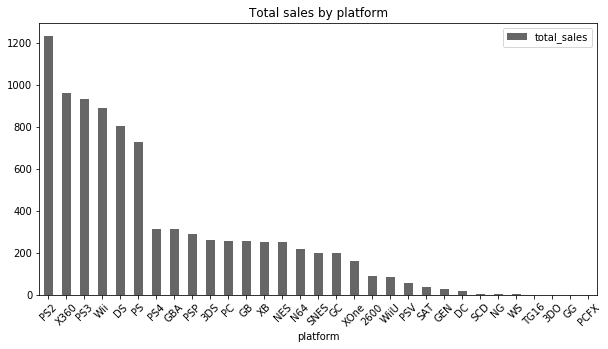

In [22]:
top_sales_plat = (platform_year_grouped.groupby('platform')['total_sales']
                  .sum().reset_index().sort_values(by='total_sales', ascending=False) )
top_sales_plat.plot(x='platform',kind='bar',figsize=(10,5), rot=45, colormap='Accent_r')
plt.title('Total sales by platform')
plt.show()

Производители явно зарабатывают не на продажах игр для PC (11е место).  
Определим топ платформы, как платформы с количеством проданных копий больше 600 млн.

In [23]:
#в топ по суммарным продажам попадают следующие платформы
top = top_sales_plat.query('total_sales > 600')['platform'].unique()
print(*top, sep='\n')

PS2
X360
PS3
Wii
DS
PS


Посмотрим, как меняли продажи по топ платформам.

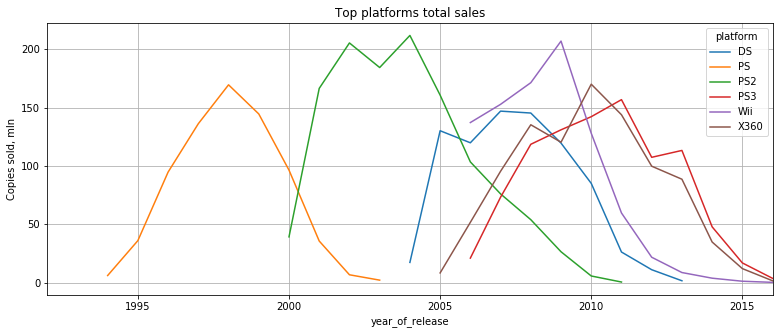

In [24]:
fig, ax = plt.subplots(figsize = (15,3))
pd.pivot_table(platform_year_grouped.query('platform in @top'),
               index='year_of_release',columns='platform',
                values='total_sales', aggfunc = 'sum').plot(grid=True, figsize=(13,5),ax=ax)
plt.title('Top platforms total sales')
plt.xlim(1992,2016) 
plt.ylabel('Copies sold, mln')
plt.show()

Исходя из графика можно сказать, что для топ платформ производители выпускают игры примерно в течении 10 лет. Примерно после 5 лет начинается спад в продажах, а через 7 лет с момента выпуска платформы - появляется ее новая версия.

___________
Рынок игровых активно меняется, для составления прогноза на 2017 определим актуальный период с 2013г, но график построим с 2012 - так  будет видно, когда появилось два текущих лидера - PS4 и XOne

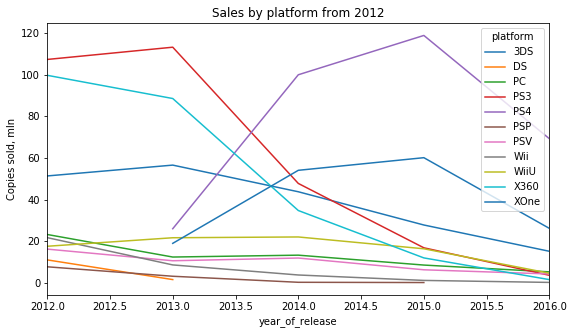

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
pd.pivot_table(platform_year_grouped.query('year_of_release >= 2012'),
               index='year_of_release',columns='platform',
                values='total_sales', aggfunc = 'sum').plot(figsize=(9,5),ax=ax)
plt.title('Sales by platform from 2012')
plt.xlim(2012,2016) 
plt.ylabel('Copies sold, mln')
plt.show()

Достаточно много графиков для оценки, выделим топовые платформы по продажам с 2013 г.

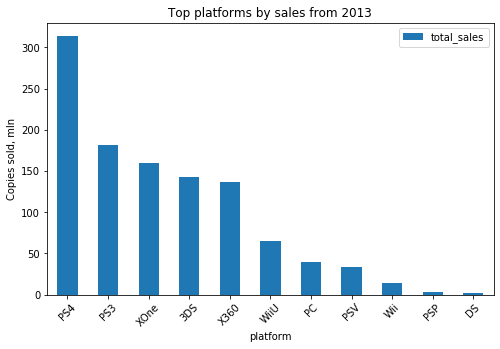

In [26]:
current_period = (platform_year_grouped.query('year_of_release >= 2013')
                  .groupby('platform')['total_sales']
                  .sum()
                  .reset_index()
                    .sort_values(by='total_sales', ascending=False)
                      .reset_index(drop=True))

current_period.plot(kind='bar',x='platform',figsize=(8,5),rot=45)
plt.title('Top platforms by sales from 2013')
plt.ylabel('Copies sold, mln')
plt.show()

В актуальном периоде по продажам лидирует 5 платформ ( продажи более 100млн. копий )
- PS 4
- PS 3 
- XOne
- 3DS
- X360

Построим график по продажам этих платформ за актуальный период (с 2013г.)

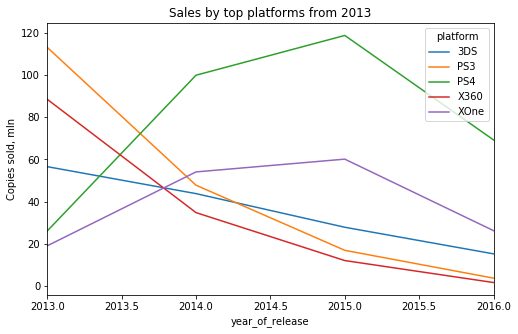

In [27]:
current_top_platform = current_period.query('total_sales > 100')['platform'].unique()
fig, ax = plt.subplots(figsize = (8,6))
pd.pivot_table(platform_year_grouped.query('year_of_release >= 2013 and platform in @current_top_platform'),
               index='year_of_release',columns='platform',
                values='total_sales', aggfunc = 'sum').plot(figsize=(8,5),ax=ax)
plt.title('Sales by top platforms from 2013')
plt.xlim(2013,2016) 
plt.ylabel('Copies sold, mln')
plt.show()


Скорее всего данные за 2016г. являются неполными. Это так же было отмечено в описании к данным.  
В текущем периоде можно выделить две перспективные с токи зрения роста платформы - PS4 и XOne, думаю что в 2016 они продолжили рост.

Построим график "ящик с усами" по глобальным продажам игр по двум платформам - PS4 и XOne.

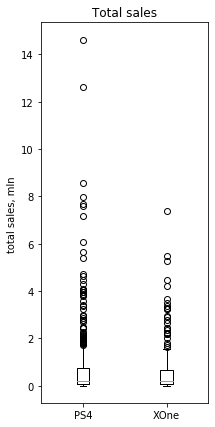

platform
PS4     314.14
XOne    159.32
Name: total_sales, dtype: float64

In [28]:
def platformBoxplot (query1, query2): #этот график мне еще понадобится
    plt.figure(figsize=(3,7)) #увеличивал размер графика до (5,25) что бы было нагляднее 
    plt.boxplot([games.query(query1)['total_sales'],
            games.query(query2)['total_sales']],
           labels = ['PS4','XOne'])
    plt.title('Total sales')
    plt.ylabel('total sales, mln ')
    plt.show()
    return plt.show()

platformBoxplot('platform == "PS4"','platform == "XOne"' )
#общие продажи по двум платформам
games.query('platform in ["PS4","XOne"]').groupby('platform')['total_sales'].sum()

Графики выглядят достаточно похоже, однако сильно выделяются хиты на PS4 - игры с общими продажами более 6 млн. копий.  
График не говорит о том, что платформы одинаково успешны, это лишь показыват то, что количество проданных копий игр распределяется похожим образом на этих платформах.  
Интересно, что продажи отличаются в 2 раза!  
Решил разобраться почему - может это хиты так "вытягивают" в лидеры PS4? 

In [29]:
#смотрим, что за топ игры на PS4
top_games = games.query('platform == "PS4" and total_sales > 6')['name'].unique() 
print ('Сумма проданных копий с играми от 6млн в общих продажах PS4',games.
       query('platform == "PS4" and total_sales > 6')['total_sales']
       .sum()) 
#те же игры на XOne
print ('Те же игры на XOne',games.query('name in @top_games and platform == "XOne"')['total_sales'].sum())
print()
#теперь продажи без хитов
print ('Продажи без хитов',games.query('platform in ["PS4","XOne"] and name not in @top_games ')
       .groupby('platform')['total_sales']
       .sum())
#разница без хитов так же в 2 раза.

Сумма проданных копий с играми от 6млн в общих продажах PS4 72.32000000000001
Те же игры на XOne 34.08

Продажи без хитов platform
PS4     241.82
XOne    125.24
Name: total_sales, dtype: float64


Дело не в хитах, проверим на играх, которые были выпущены на обоих платформах. Действительно ли PS4 более успешна?

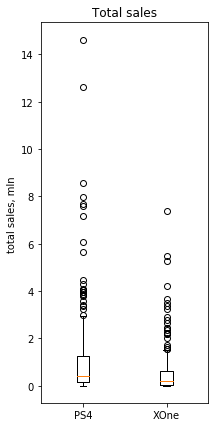

platform
PS4     314.14
XOne    159.32
Name: total_sales, dtype: float64

In [30]:
#составим список толко тех игр, которые были выпущены для обоих платформ.
both_platforms_games = (games.query('platform in ["PS4","XOne"]')[['platform','name']]
    .groupby('name')
    .count()
    .reset_index()
    .query('platform == 2')['name']
    .unique())
#таких игр 217
(games.query('platform in ["PS4","XOne"] and name in @both_platforms_games')
    .groupby('platform')['total_sales']
    .sum())

platformBoxplot ('platform == "PS4" and name in @both_platforms_games',
                'platform == "XOne" and name in @both_platforms_games')

games.query('platform in ["PS4","XOne"]').groupby('platform')['total_sales'].sum()

Можно сделать вывод, что платформа PS4 успешеннее для выпуска игр, анализируя только игры выпущенные и для PS4 и для XOne продажи для PS4 в среднем были выше.

_____________
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Сделаем для двух новых платформ  - PS4 и XOne.


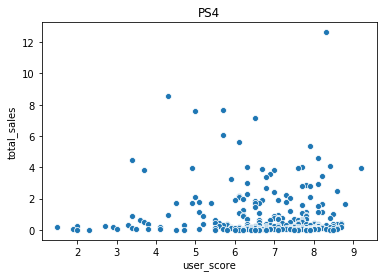

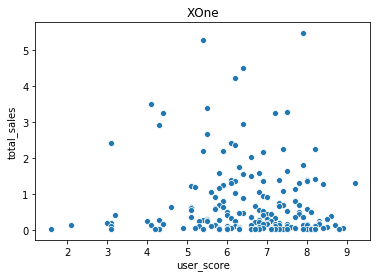

In [31]:
ps4 = games.query('platform == "PS4"')[['total_sales','user_score','critic_score']]
sns.scatterplot(data=ps4, x="user_score", y="total_sales").set_title('PS4')
plt.show()
xone = games.query('platform == "XOne"')[['total_sales','user_score','critic_score']]
sns.scatterplot(data=xone, x="user_score", y="total_sales").set_title('XOne')
plt.show()

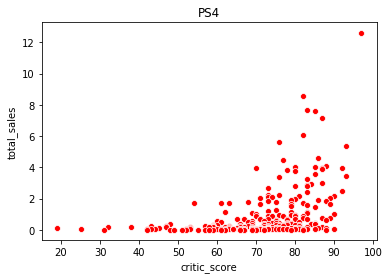

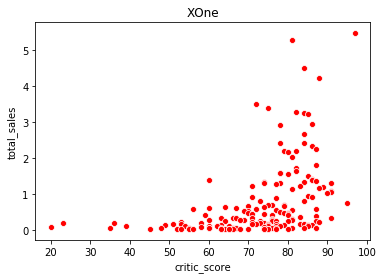

In [32]:
sns.scatterplot(data=ps4, x="critic_score", y="total_sales", color='red').set_title('PS4')
plt.show()

sns.scatterplot(data=xone, x="critic_score", y="total_sales", color='red').set_title('XOne')
plt.show()

In [33]:
print('Коффициенты корреляции для PS4')
ps4.corr()

Коффициенты корреляции для PS4


,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


In [34]:
print('Коффициенты корреляции для XOne')
xone.corr()

Коффициенты корреляции для XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


Исходя из графиков и таблиц коэффициентов корреляции, можно сказать, что наблюдается небольшая прямая зависимость продаж и рейтингов критиков (с высокой оценкой у игры больше шансов на успех).  
В то время как продажи и рейтинг пользователей не зависят на прямую друг от друга почти совсем.  
В графиках для разных платформ нет существенных отличий, возможно это говорит о том, что платформа не влияет на оценку игры ни у пользователей ни у критиков.

___________
Посмотрим на общее распределение игр по жанрам.

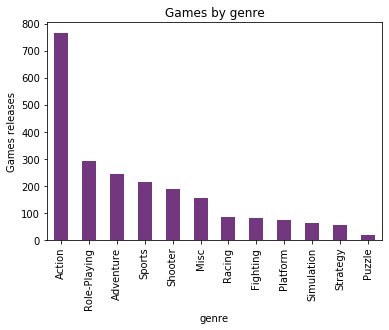

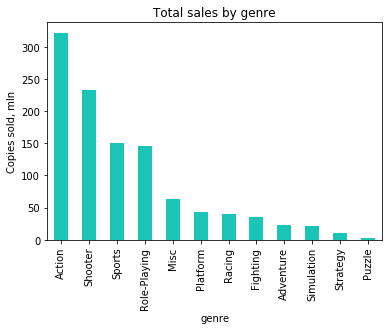

In [35]:
(games.query('year_of_release >= 2013')
    .groupby('genre')['name']
    .count()
    .reset_index()
    .sort_values(by='name', ascending=False)
    .plot(kind='bar', x='genre', title ='Games by genre', legend=False, color='#733780'))
plt.ylabel('Games releases')
plt.show()

(games.query('year_of_release >= 2013')
    .groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', x='genre', title ='Total sales by genre', legend=False, color='#1ac4b6'))
plt.ylabel('Copies sold, mln')
plt.show()


Больше всего игр выпускается в стиле Action - это безоговорочный лидер, больше всего игр выпускается именно в этом жанре.  
По общим продажам ситуация более ровная, и можно выделить несколько лидеров:
   - Action
   - Shooter
   - Sports
   - Role-Playing
   
Игры в стилях Simulation, Strategy, Puzzle не привлекают внимание разработчиков - меньше всего выпущенных игр, меньше всего проданных копий.   

</span><a id='users'></a>
_________
## 4. Составим портрет пользователя каждого региона

Составим рейтинги популярности платформ по регионам.

In [36]:
platform_gegion = (games.query('year_of_release >= 2013')
    .groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False))
platform_gegion.rank(ascending=False).style.background_gradient('PRGn')

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
PS4,1,1,4,1
XOne,2,3,8,3
X360,3,4,7,4
PS3,4,2,2,2
3DS,5,5,1,5
WiiU,6,7,5,6
PC,7,6,10.5,8
Wii,8,9,9,9
PSV,9,8,3,7


Европейский и американский рынок приставок очень похожи  - PS4 и XOne в лидерах. На японском рынке 1 и 3 место занимают портативные приставки (!) 3DS и PSV соответственно (интересное отличие).

In [37]:
def percentColumn (data, column):
    percent = (data[column] / data[column].sum() * 100).round(2)
    return percent

In [38]:
platform_gegion['na_%'] = percentColumn (platform_gegion,'na_sales')
platform_gegion['eu_%'] = percentColumn (platform_gegion,'eu_sales')
platform_gegion['jp_%'] = percentColumn (platform_gegion,'jp_sales')
platform_gegion['other_%'] = percentColumn (platform_gegion,'other_sales')
platform_gegion[['na_%','eu_%','jp_%','other_%']].style.background_gradient('hot_r')

,na_%,eu_%,jp_%,other_%
platform,,,,
PS4,24.84,35.97,11.34,40.3
XOne,21.27,13.15,0.24,11.89
X360,18.66,10.84,0.36,10.09
PS3,14.51,17.29,16.59,22.31
3DS,8.73,7.89,48.17,5.23
WiiU,6.67,5.06,7.73,3.91
PC,2.54,6.47,0,2.47
Wii,1.5,1.51,0.04,0.93
PSV,1.15,1.56,13.21,2.72


На американском рынке новые приставки PS4 и XBox одинаково популярны, на двоих 46%  
На европецском рынке PS4(36%) заметно популярнее XOne (13%) - их общая доля - 49%  
На японском рынке доля только портативной 3DS составляет 48% ! PS4 и XOne вместе занимают только лишь 11.6% рынка!

___________
Теперь посмотрим какие игровые жанры популярны среди жителей Америки, Европы и Японии.  
Составим рейтинг.

In [39]:
genre_region = (games.query('year_of_release >= 2013')
    .groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False))
genre_region.rank(ascending=False).style.background_gradient('RdBu')

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,1,1,2,1
Shooter,2,2,5,2
Sports,3,3,7,3
Role-Playing,4,4,1,4
Misc,5,6,3,5
Platform,6,7,8,7
Fighting,7,9,4,8
Racing,8,5,10,6
Adventure,9,10,6,9


Популярные жанры игры на американском и европейском рынках - Action и Shooter.  
Японский рынок отличается не только предпочтения по платформам, но и игровым жанрам - популярные - Role-Playing и Action.  
Игры в стиле Action популярны везде!

In [40]:
genre_region['na_%'] = percentColumn (genre_region,'na_sales')
genre_region['eu_%'] = percentColumn (genre_region,'eu_sales')
genre_region['jp_%'] = percentColumn (genre_region,'jp_sales')
genre_region['other_%'] = percentColumn (genre_region,'other_sales')
genre_region[['na_%','eu_%','jp_%','other_%']].style.background_gradient('hot_r')

,na_%,eu_%,jp_%,other_%
genre,,,,
Action,28.8,30.12,28.76,31.01
Shooter,25.07,22.4,4.7,23.98
Sports,14.91,15.43,3.84,16.21
Role-Playing,10.6,9.43,36.26,9.57
Misc,6.28,5.11,6.54,5.08
Platform,4.14,3.97,3.4,3.43
Fighting,3.55,2.18,5.43,2.97
Racing,2.96,5.15,1.63,3.7
Adventure,1.63,2.1,4.13,2.03


Самые непопулярные игры на рынке в целом - Strtegy и Puzzle - одинаковая ситуация по всем регионам.  
Суммарная доля этих жанров менее 2% 

___________
Посмотрим какие игры по рейтингу ESRB популярны  в разных регионах.

In [41]:
rating_region = (games.query('year_of_release >= 2013')
                 .groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']]
                 .sum()
                 .sort_values(by='na_sales', ascending=False))
rating_region['na_%'] = percentColumn (rating_region,'na_sales')
rating_region['eu_%'] = percentColumn (rating_region,'eu_sales')
rating_region['jp_%'] = percentColumn (rating_region,'jp_sales')
rating_region['other_%'] = percentColumn (rating_region,'other_sales')
rating_region[['na_%','eu_%','jp_%','other_%']].style.background_gradient('hot_r')


,na_%,eu_%,jp_%,other_%
rating,,,,
M,47.43,46.38,25.32,48.74
E,22.7,26.61,27.17,23.43
E10+,15.57,13.63,10.57,13.02
T,14.3,13.39,36.95,14.81


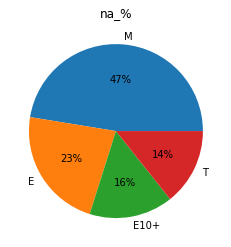

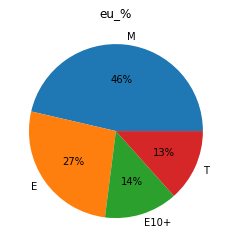

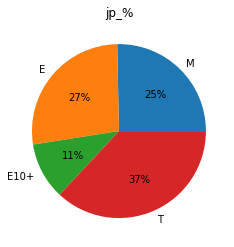

In [42]:
for i in rating_region[['na_%','eu_%','jp_%']].columns: 
    plt.title(i)
    plt.pie(rating_region[i], autopct='%.0f%%',labels=rating_region.index)
    plt.show()


Если в целом можно сказать, что вмериканский и европейский рынок отдает предпочтение либо играм с рейтингом M (Mature, для взрослых) либо E(Everyone, для всех), для для японского рынка это игры T(Teen, для подростков). 

</span><a id='conclusion'></a>
_______
## Общий вывод

Общие рекомендации.

Для планирования рекламных кампаний на 2017 год нужно обязательно учитывать следующие факторы: 
- Рынок игровых платформ и пользовательских предпочтений в Японии существенно отличается от мирового.  

- Самая популярная платформа Японии – портативная 3DS (Nintendo) занимает 48% рынка, вторая по популярности - PS3 (16% рынка), которой на смену уже приходит выпущенная в 2013г. - обновленная PS4. В то время как в северной америке, европе и остальных регионах уже лидирует PS4.  

- Вышедшие в 2013г.  обновленные приставки PS4  и Xbox One активно завоевывают рынкок. В среднем такие платформы поддерживаются производителями игр в течении 10 лет, причем первые 5 лет идет активный рост продаж. Примерно раз в 7 лет такие платформы обновлются – выходят новые версии. Можно с увереностью сказать, что 2017-2018 гг. продажи игр для для платформ PS4 и Xbox One будут на пике.

Рекомендации по регионам.

**Япония**   
Стоит отметить, что в Японии предпочитают портативные приставки, однако  скорее всего на смену 3DS в ближайшее время должно выйти обновление, так как она уже существует на рынке в  течении 6 лет. Популярность игр для этой платформы будет снижаться. Будет набирать популярность обновленная платформа от Nintendo. 

Популярностью пользуются игры в жанрах Action и Role-Playing. Игры с рейтингом T (Teen, для подростков) и M(Mature, для взрослых) пользуются наибольшим спросом.
 
**Для рынка северной америки, европы и других регионов**  
В 2017-2018 наиболее успешными будут платфомы Xbox One и PS4, игры в жанрах Action и Shooter, а также игры с рейтингом ESRB M (Mature, для взрослых) или E(Everyone, для всех).

Отдельным плюсом можно считать высокие рейтинги критиков у новых игр – у таких релизов больше вероятность на высокие продажи.
